In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Load Dataset
data = pd.read_csv("creditcard.csv")
print("Original data shape:", data.shape)
print(data["Class"].value_counts())  # Check imbalance


Original data shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


In [3]:
# Step 3: Separate Features and Target
X = data.drop(columns="Class", axis=1)
Y = data["Class"]


In [4]:
# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Step 5: Train-Test Split (before SMOTE!)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)


In [6]:
# Step 6: Apply SMOTE to training data only
sm = SMOTE(random_state=42)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print("After SMOTE:")
print(pd.Series(Y_train_res).value_counts())


After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [7]:
# Step 7: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, Y_train_res)


LogisticRegression(max_iter=1000)

In [8]:
# Step 8: Predict and Evaluate
Y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))

print("\nClassification Report:\n")
print(classification_report(Y_test, Y_pred))


Accuracy: 0.973807099469822
Precision: 0.05886075949367089
Recall: 0.9489795918367347
F1 Score: 0.11084624553039331

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.95      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.97      0.99     56962



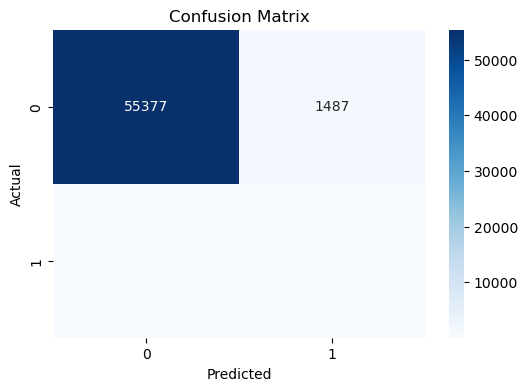

In [9]:
# Step 9: Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


C:\Users\yashh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9955057757803448
Precision: 0.2620481927710843
Recall: 0.8877551020408163
F1 Score: 0.4046511627906977

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.89      0.40        98

    accuracy                           1.00     56962
   macro avg       0.63      0.94      0.70     56962
weighted avg       1.00      1.00      1.00     56962



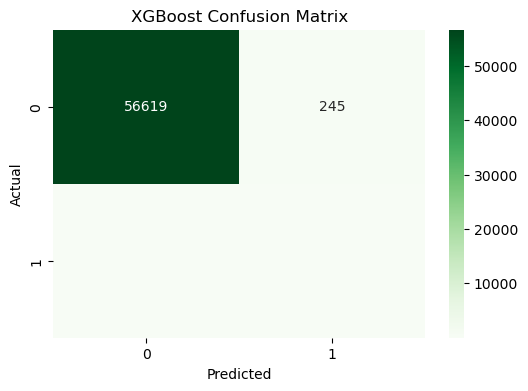

In [10]:
# Step 1: Import XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Step 2: Initialize and train XGBoost
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train_res, Y_train_res)
# Step 3: Make predictions
Y_pred_xgb = xgb_model.predict(X_test)

# Step 4: Evaluate
print("Accuracy:", accuracy_score(Y_test, Y_pred_xgb))
print("Precision:", precision_score(Y_test, Y_pred_xgb))
print("Recall:", recall_score(Y_test, Y_pred_xgb))
print("F1 Score:", f1_score(Y_test, Y_pred_xgb))

print("\nClassification Report:\n")
print(classification_report(Y_test, Y_pred_xgb))
# Step 5: Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()
